<a href="https://colab.research.google.com/github/farielshafee2018/MNIST-Handriting-recognition/blob/main/backpropagation_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop, Adam
#from keras.utils import np_utils
from keras import backend as k
from subprocess import check_output



In [ ]:
# load the dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# data exploration
# find unique labels

unique, counts = np.unique(y_train, return_counts=True)
print ('number of unique items:', dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print ('\n number of unique items:', dict(zip(unique, counts)))

image_size = X_train.shape[1]
print ('\nimage size:', image_size)
input_size = image_size * image_size





number of unique items: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

 number of unique items: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}

image size: 28


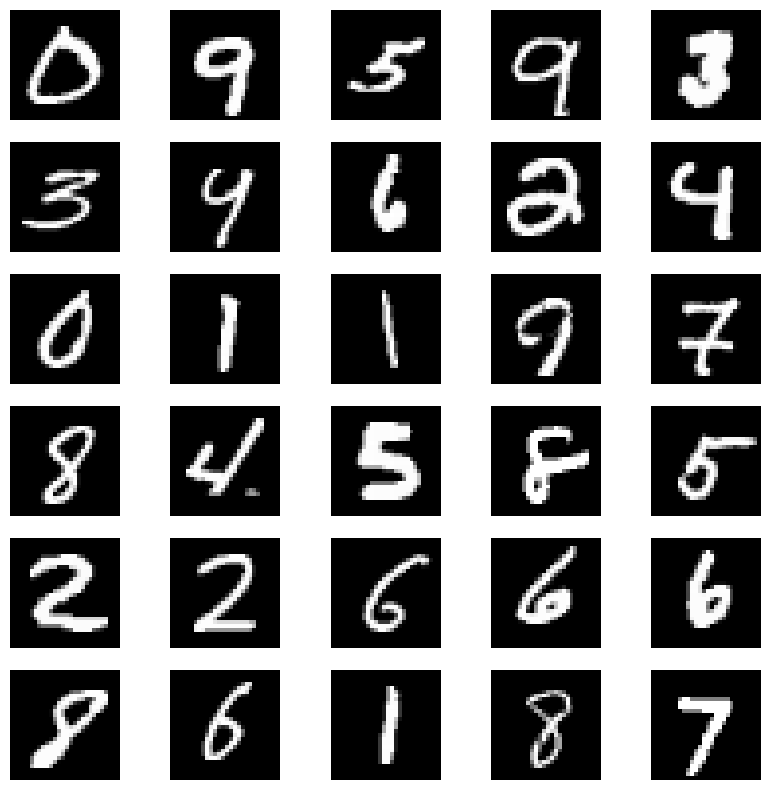

In [ ]:
# data visualization
# plot 30 random images from train

indexes = np.random.randint(0, X_train.shape[0], size=30)
images = X_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.close()







Use Keras to create the neural network

In [ ]:
from keras.utils import to_categorical, plot_model

In [ ]:
# compute number of labels and convert to one hot encoding
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [ ]:
# resize and normalize

x_train = X_train.reshape(-1, 784)
x_test = X_test.reshape(-1, 784)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# parameters : 3 sets of each
batch_size1 = 128
hidden_units1 = 256
dropout1 = 0.45

batch_size2 = 56
hidden_units2 = 128
dropout2 = 0.8

batch_size3 = 20
hidden_units3 = 400
dropout3 = 0

batchsize_list = [batch_size1, batch_size2, batch_size3]
hidden_units_list = [hidden_units1, hidden_units2, hidden_units3]
dropout_list = [dropout1, dropout2, dropout3]

size_len = len(batchsize_list)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

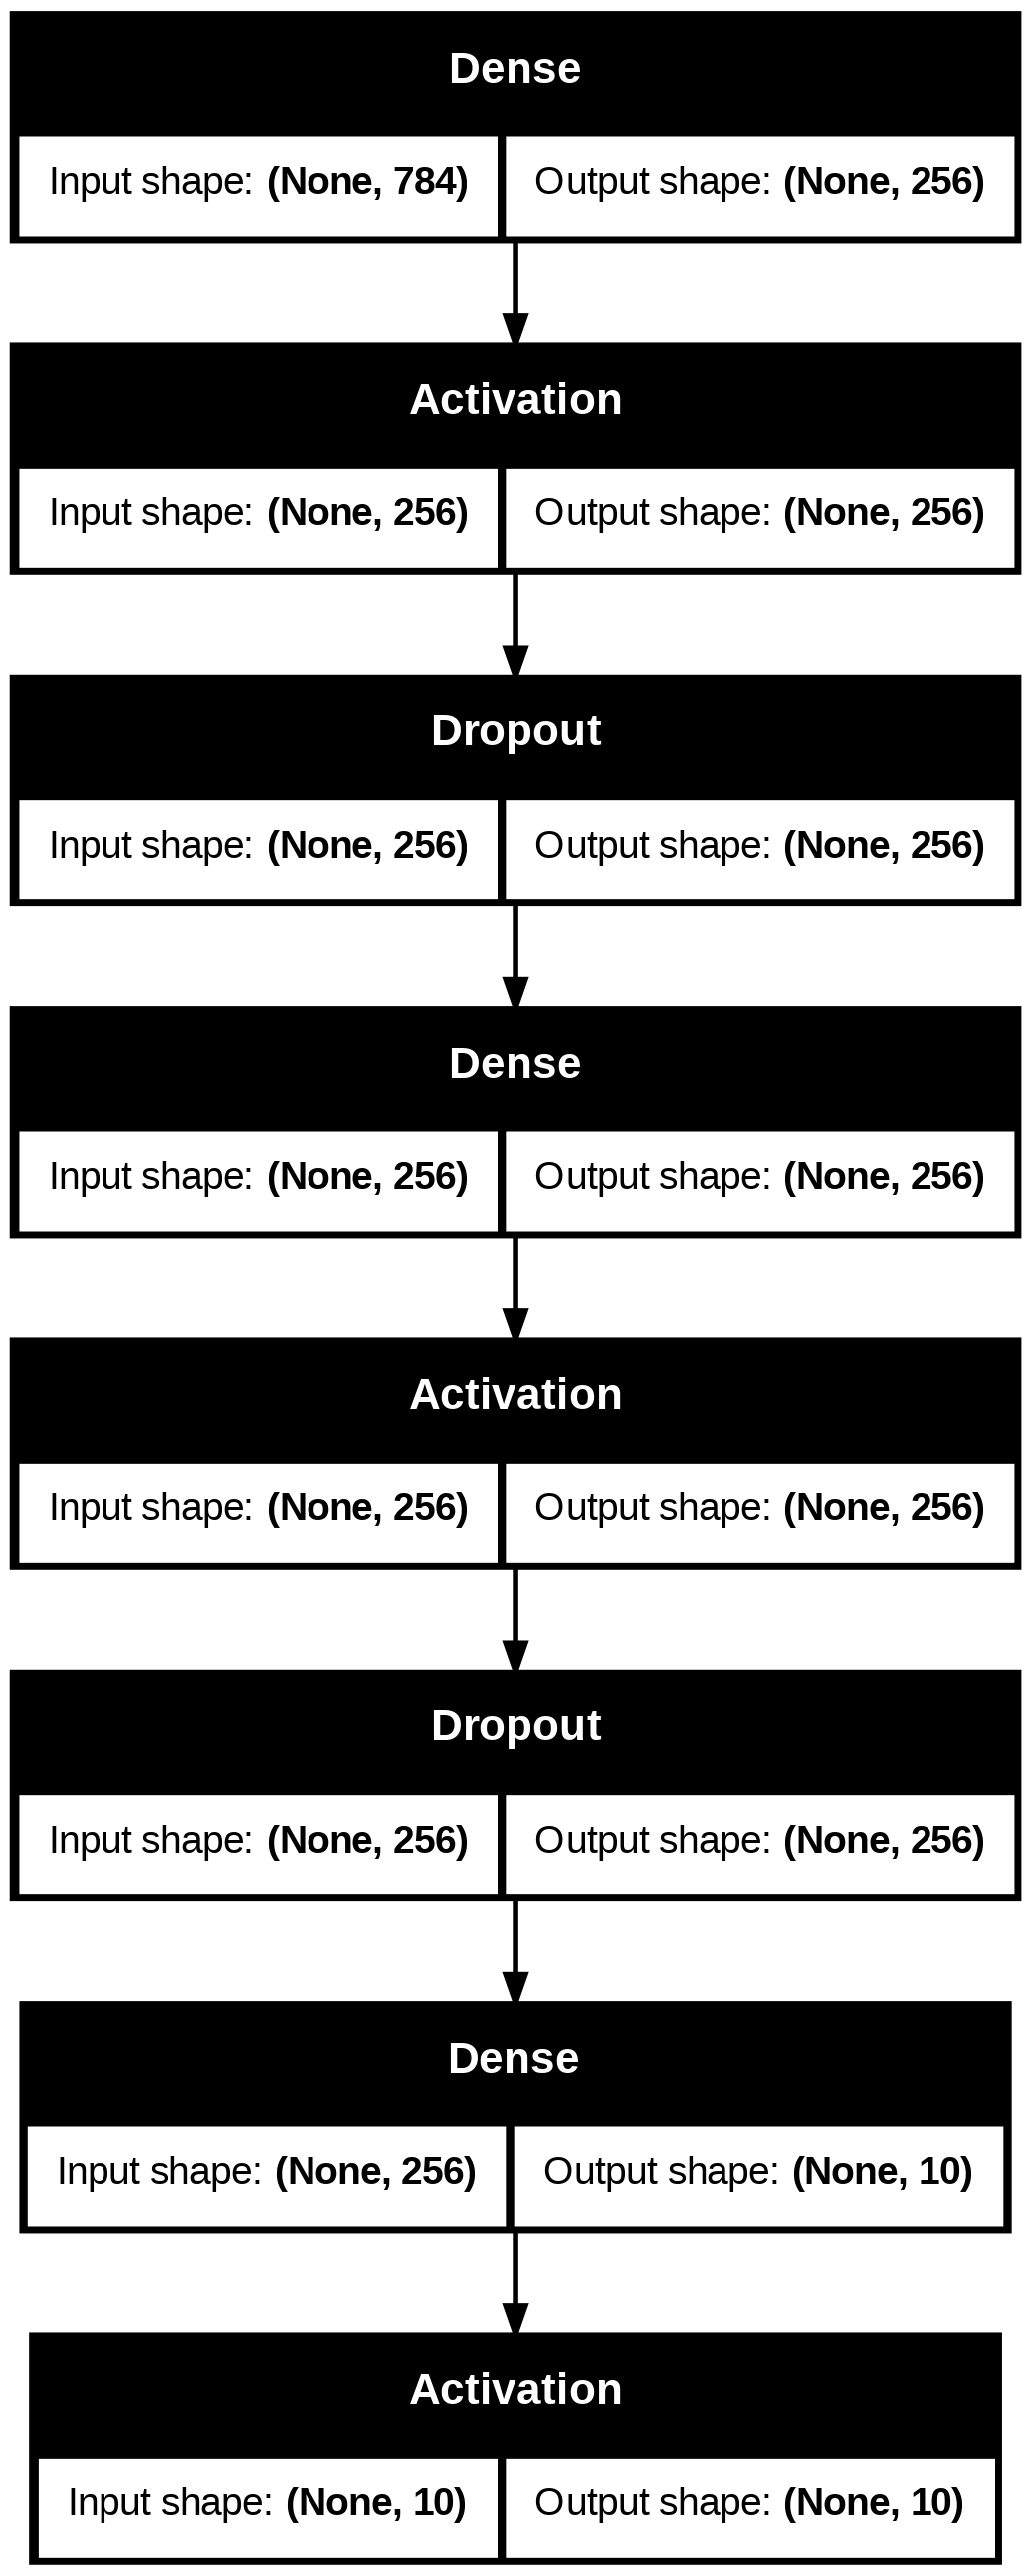

In [ ]:
# build the model

model = Sequential()
model.add(Dense(hidden_units1, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout1))
model.add(Dense(hidden_units1))
model.add(Activation('relu'))
model.add(Dropout(dropout1))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9714 - loss: 0.0921
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9735 - loss: 0.0839
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9749 - loss: 0.0825
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9746 - loss: 0.0781
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9770 - loss: 0.0726


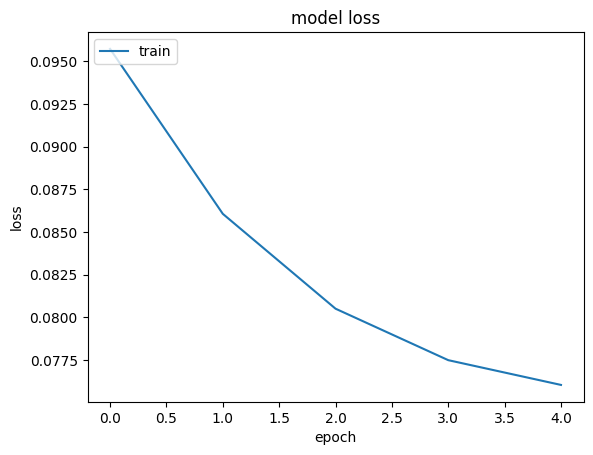

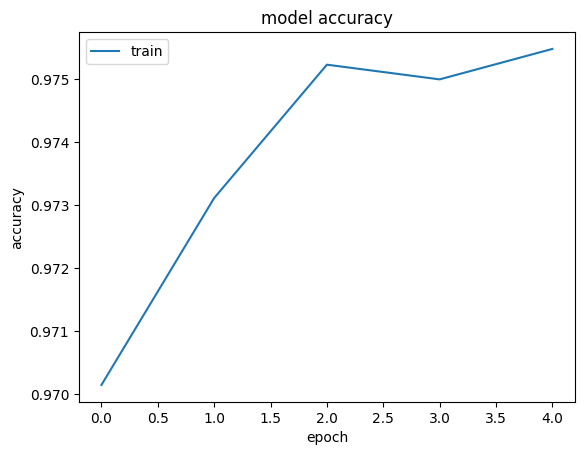

Epoch 1/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9706 - loss: 0.0942
Epoch 2/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9728 - loss: 0.0866
Epoch 3/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9744 - loss: 0.0798
Epoch 4/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9759 - loss: 0.0767
Epoch 5/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9773 - loss: 0.0729


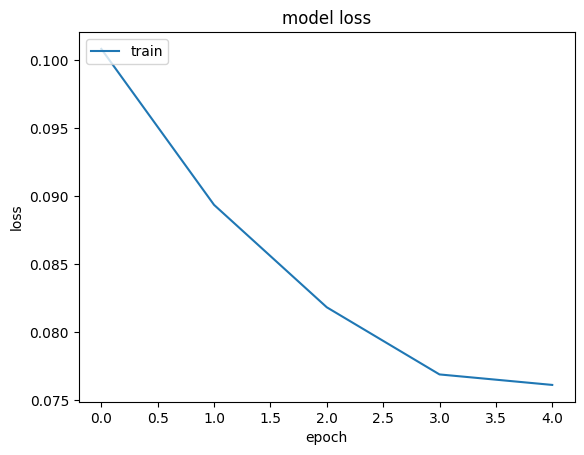

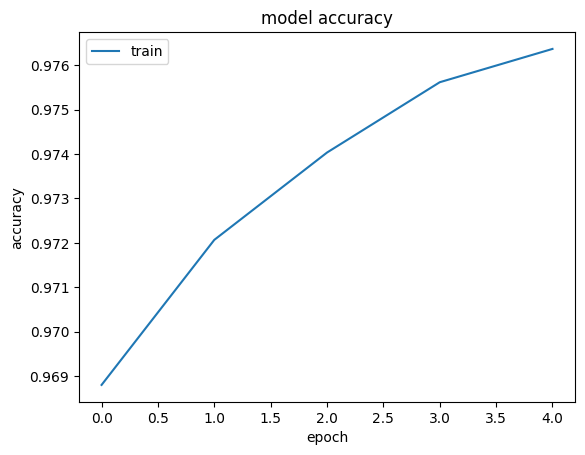

Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9662 - loss: 0.1162
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9703 - loss: 0.0928
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9708 - loss: 0.0933
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9711 - loss: 0.0955
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9721 - loss: 0.0919


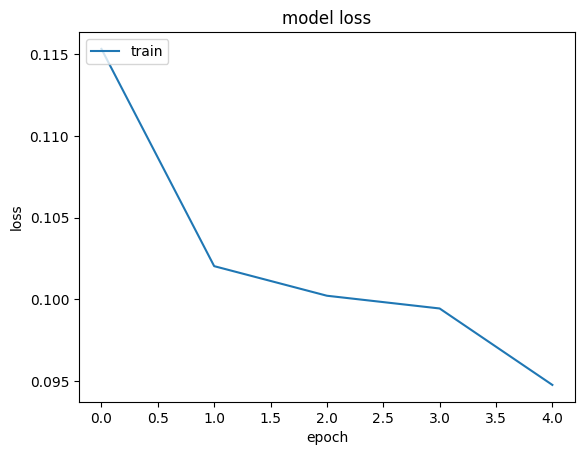

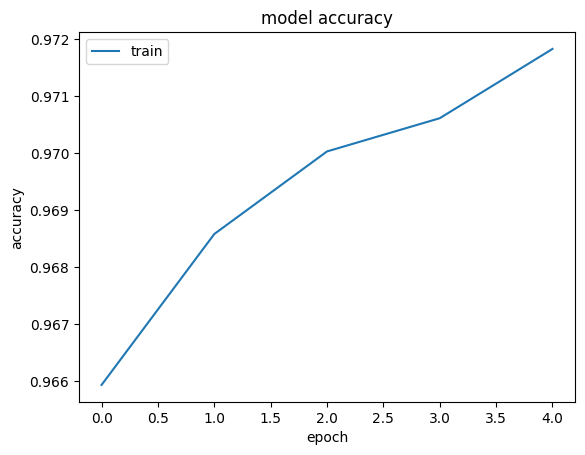

In [ ]:
# fit model
# use all three batch sizes and a smal epoch

for i in range(size_len):
    history = model.fit(x_train, y_train, epochs=5, batch_size=batchsize_list[i])
    #history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size1)
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

In [ ]:
# get stat
# use all three b
for i in range(size_len):
    loss, acc = model.evaluate(x_test, y_test, batch_size=batchsize_list[i])
    print("/n batch size is", batchsize_list[i])
    print("\nTest accuracy: %.1f%%" % (100.0 * acc))
#loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size1)
#print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9760 - loss: 0.0924

Test accuracy: 98.0%
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0922

Test accuracy: 98.0%
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0921

Test accuracy: 98.0%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

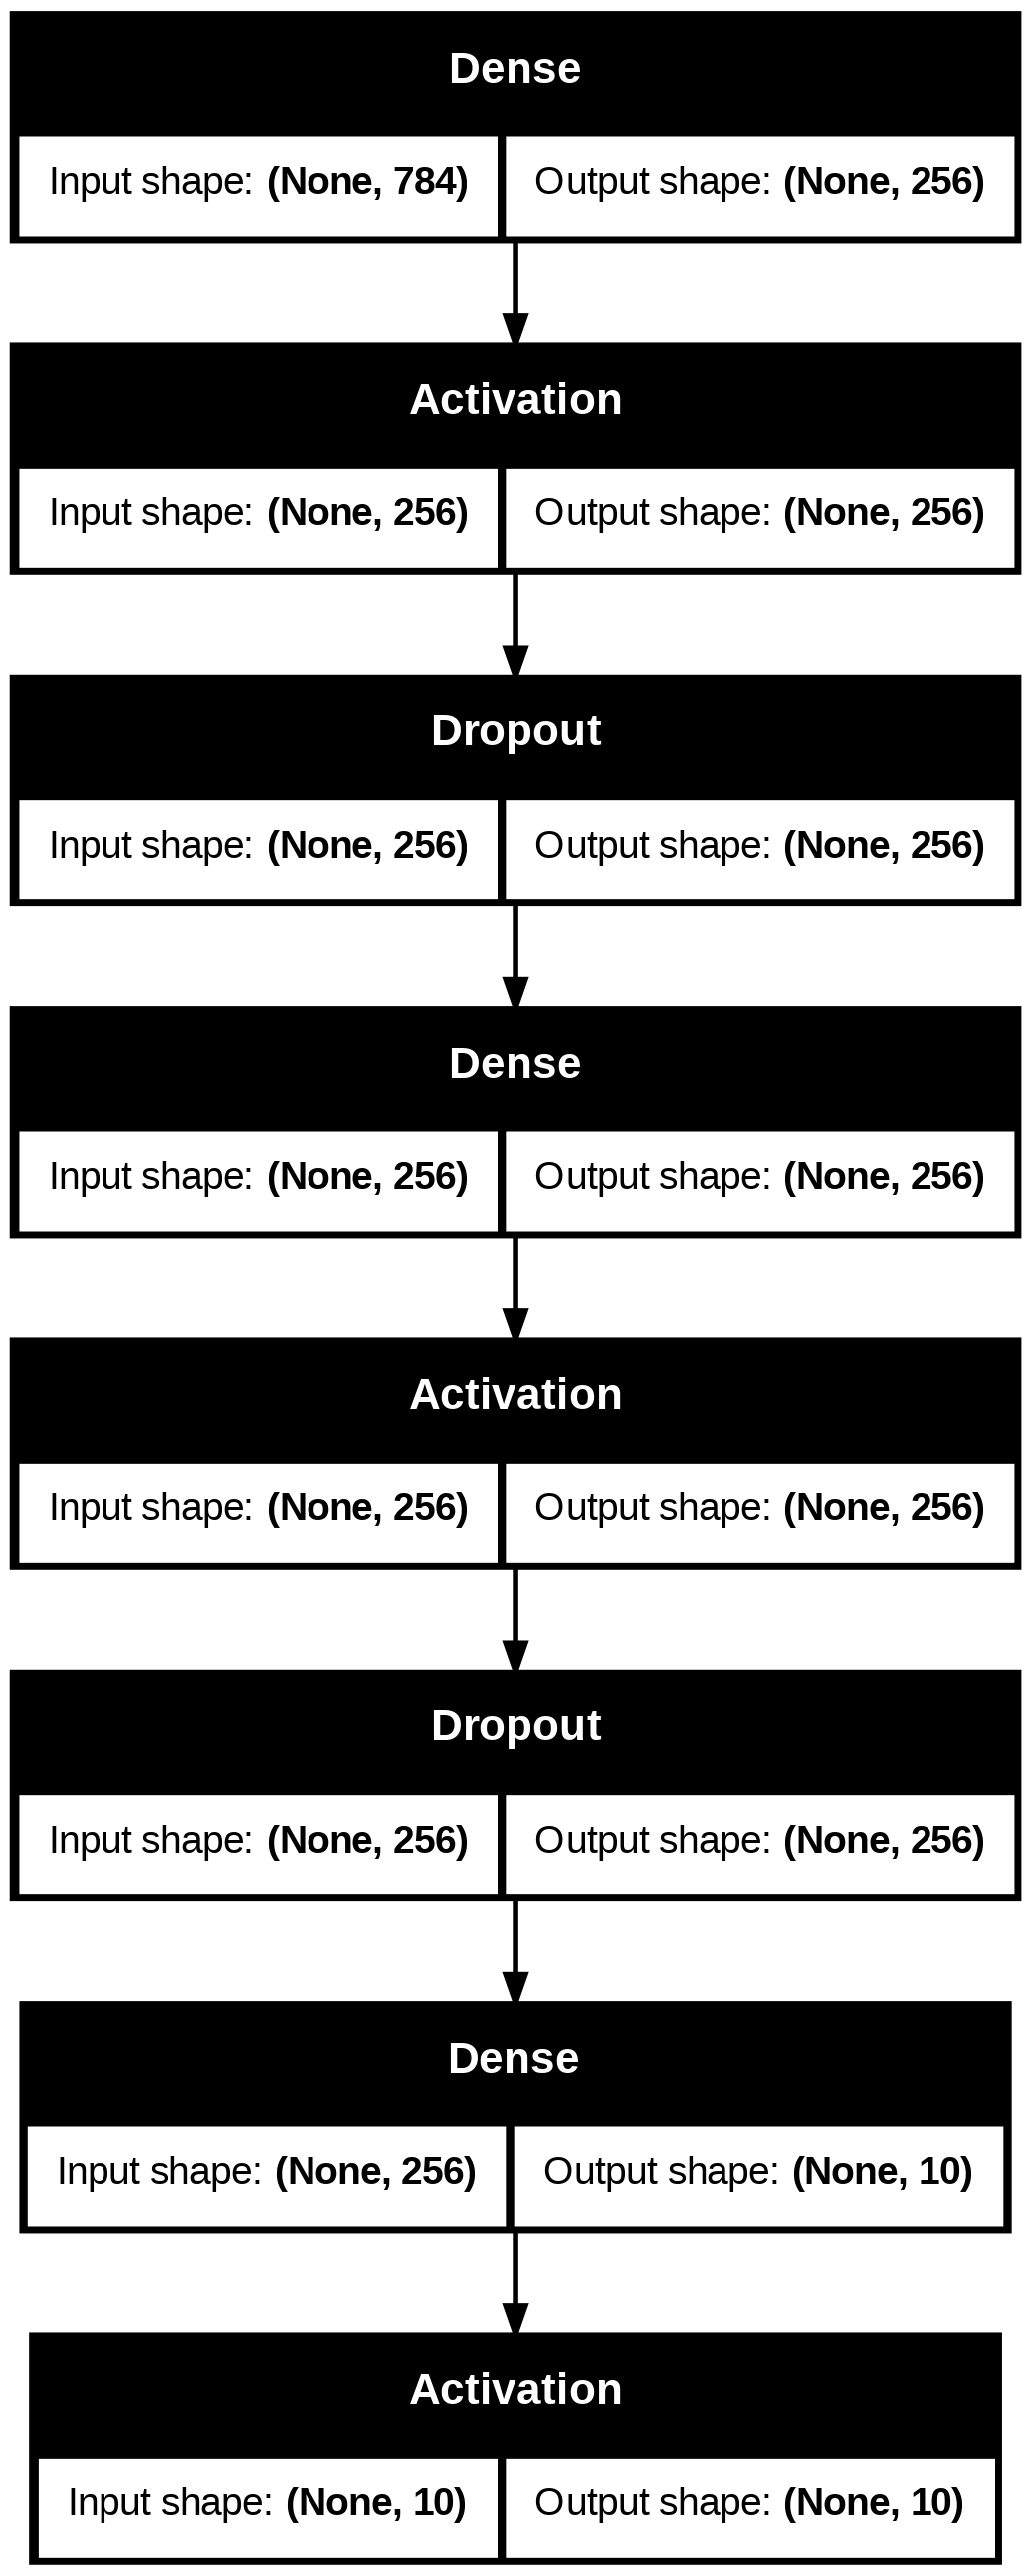

In [ ]:
# repeat with different dropouts for batchsize1


model = Sequential()
model.add(Dense(hidden_units1, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout3))
model.add(Dense(hidden_units1))
model.add(Activation('relu'))
model.add(Dropout(dropout3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()
plot_model(model, to_file='model.png', show_shapes=True)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8660 - loss: 0.4725
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9707 - loss: 0.0975
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9811 - loss: 0.0604
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9877 - loss: 0.0407
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9900 - loss: 0.0313


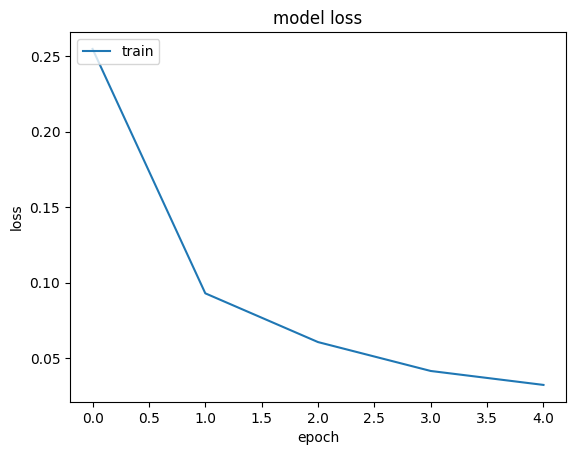

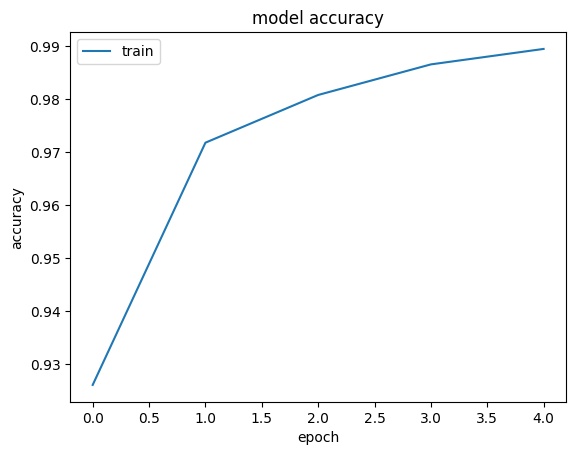

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128)
#history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size1)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batchsize_list[i])
print("/n batch size is", batchsize_list[i])
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0914
/n batch size is 20

Test accuracy: 97.7%


In [ ]:
# add large dropout

model = Sequential()
model.add(Dense(hidden_units1, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout1))
model.add(Dense(hidden_units1))
model.add(Activation('relu'))
model.add(Dropout(dropout1))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7708 - loss: 0.7153
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9378 - loss: 0.2053
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9528 - loss: 0.1590
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9625 - loss: 0.1265
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9657 - loss: 0.1099


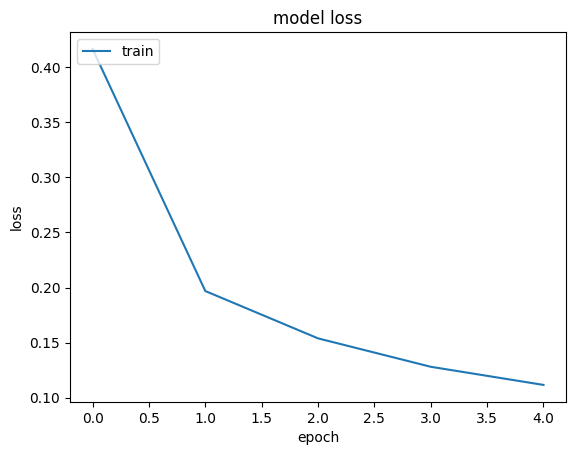

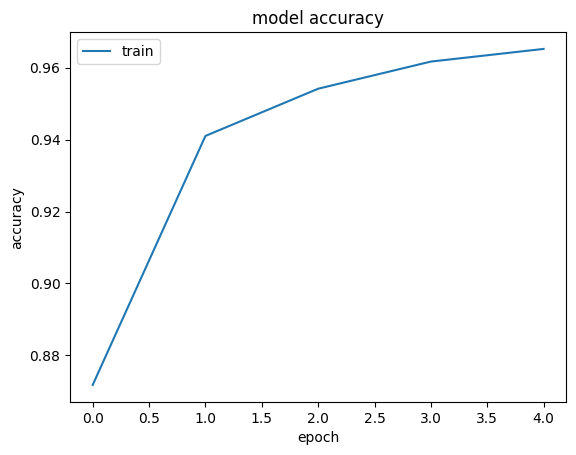

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128)
#history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size1)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# print stats for large dropout

loss, acc = model.evaluate(x_test, y_test, batch_size=128)
#print("/n batch size is", batchsize_list[i])
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9723 - loss: 0.0888

Test accuracy: 97.7%
